<a href="https://colab.research.google.com/github/bbucalonserra/data_analysis_and_best_practices/blob/main/machine_learning_and_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Best Practices Project

## Professors Tatiana Escovedo and Hugo Villamizar

## 1 Problem Definition

Today, one of the major problems faced by delivery companies is **DELAYED DELIVERIES**. In light of this, the idea emerged to create a predictive analysis using machine learning models to anticipate whether a delivery will be delayed or not based on the data collected from orders. There are no solid premises regarding the reasons for delays, only that, given that the datasets used are in a snowflake schema, a filter was applied to **analyze only motorcyclists, always in the food segment, with delivery status always marked as delivered and order status as finalized.**

The complete snowflake schema can be seen in the image below.



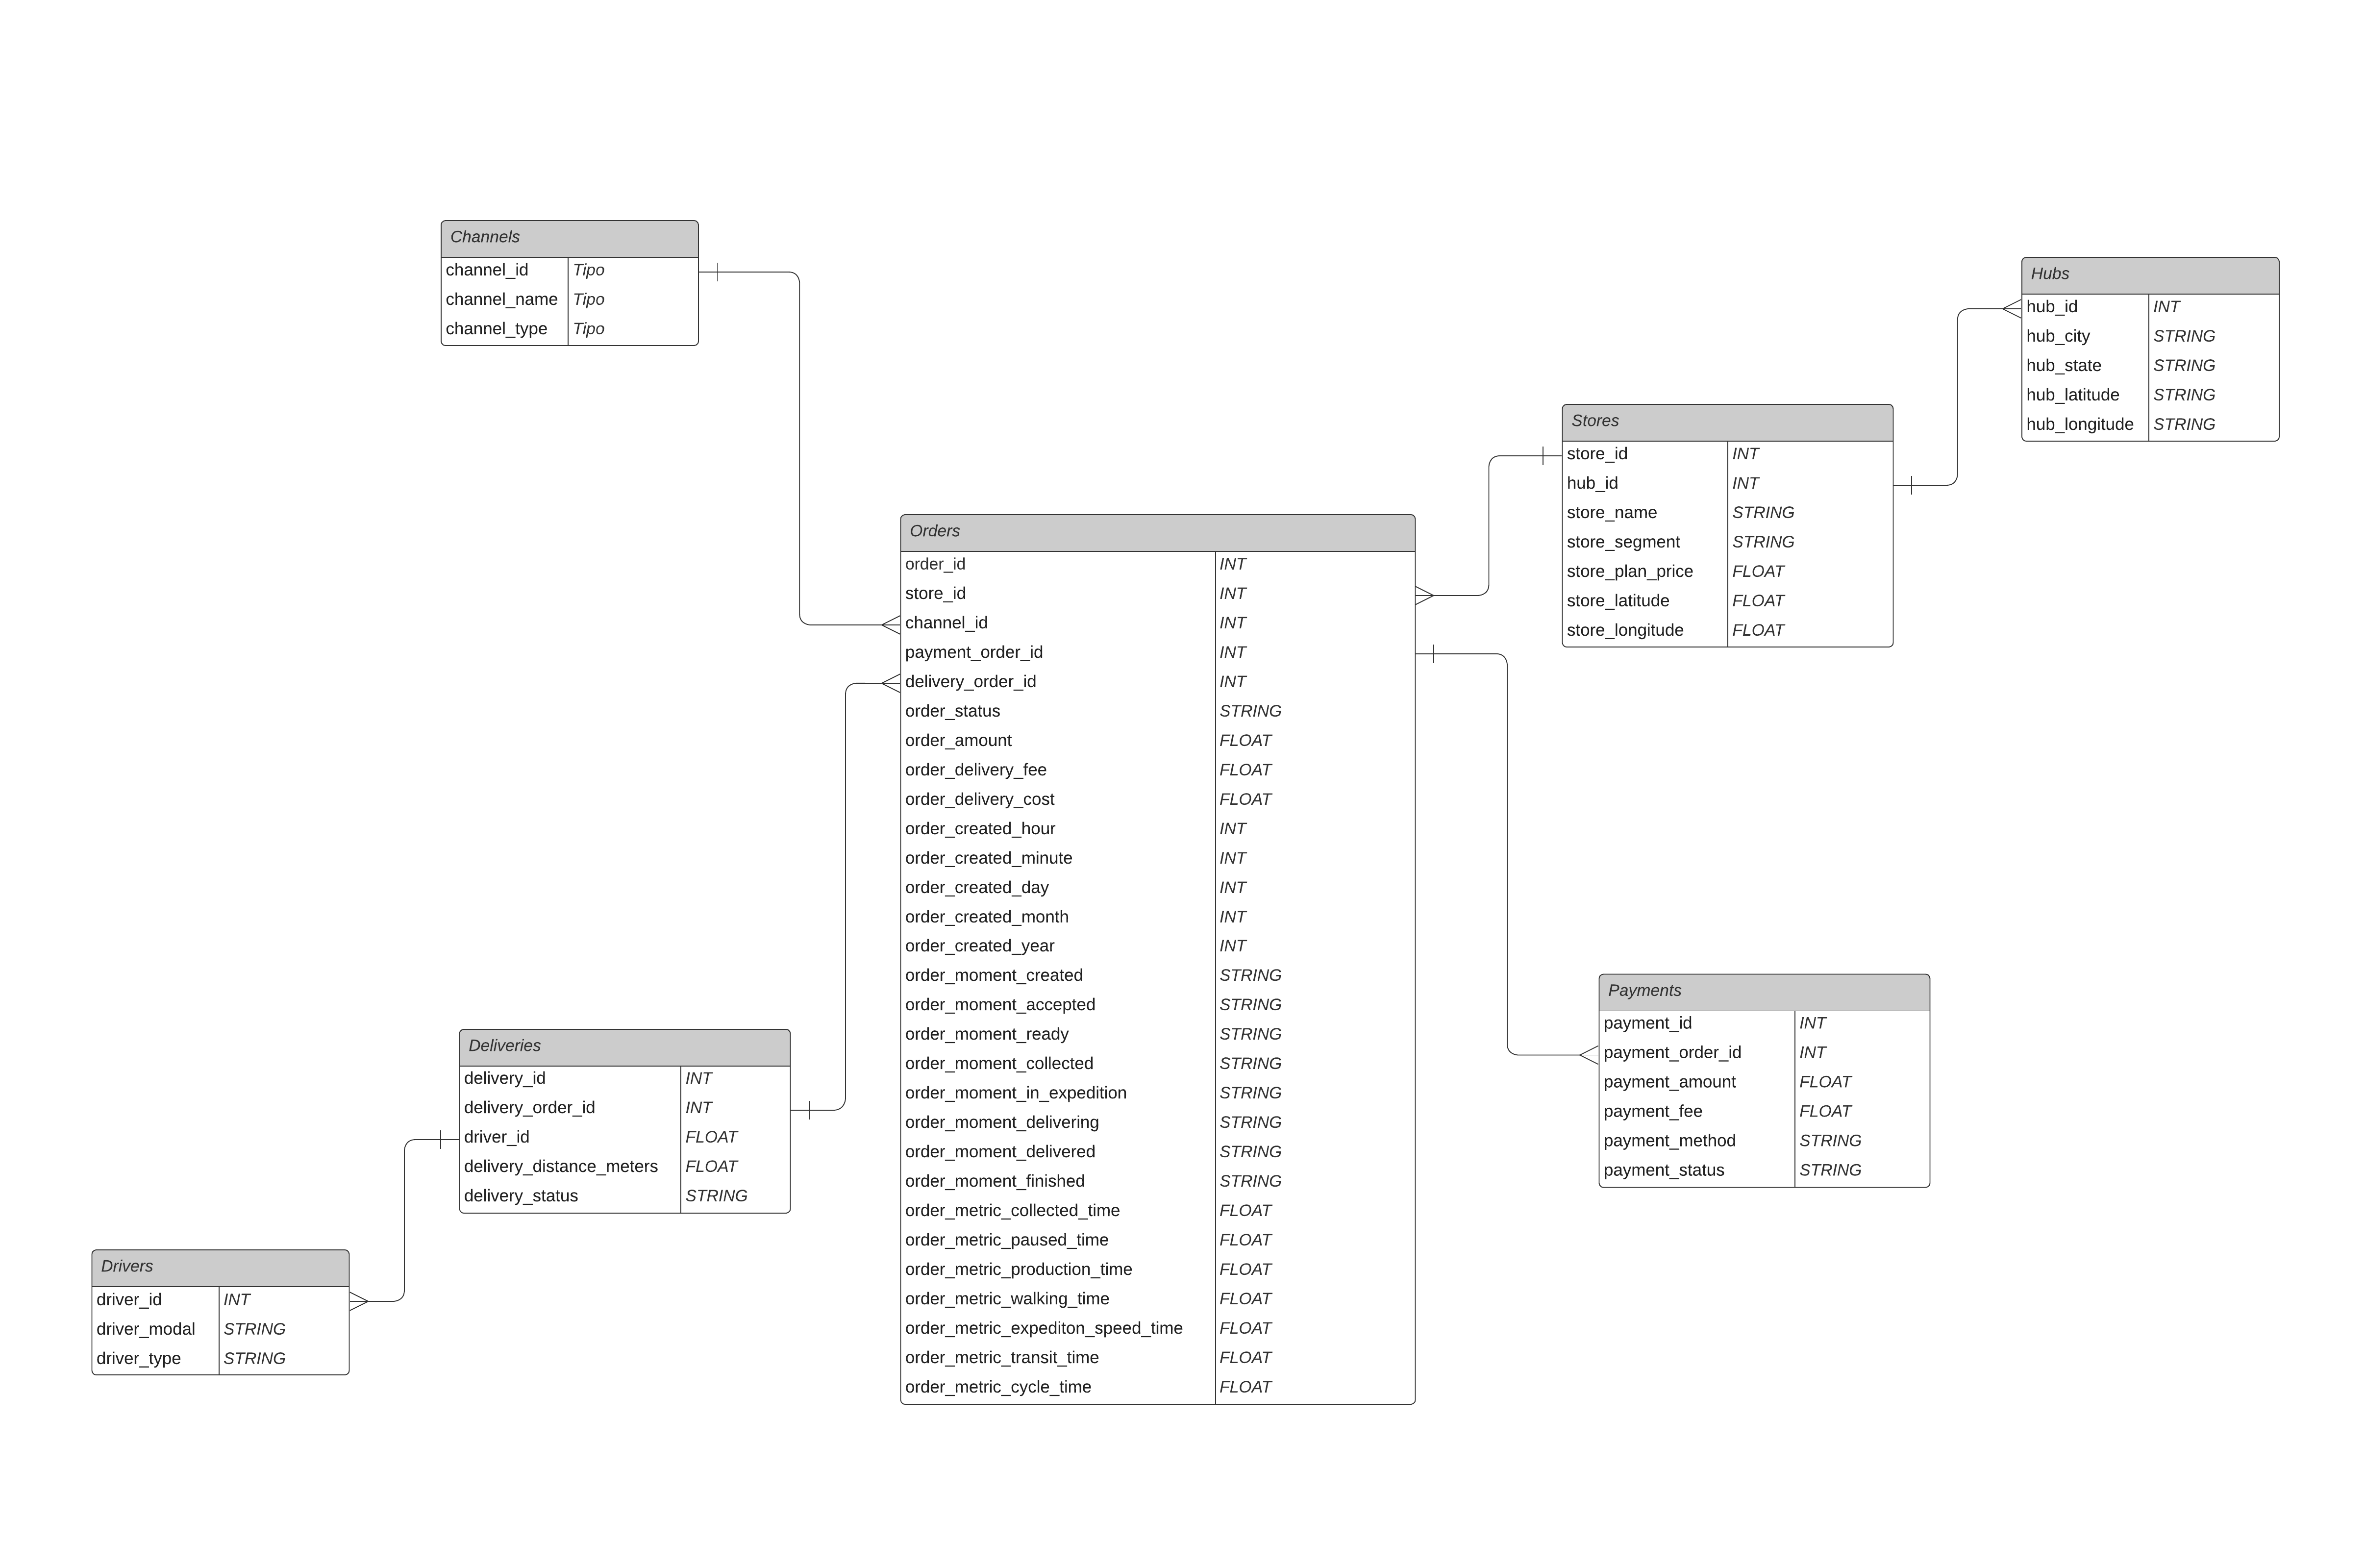

**NOTE:** The schema was created using the [Lucid App](https://www.lucidchart.com/pages) application.

Below you can check what each attribute represents.


| Dataset       | Column                        | Description                                            | Data Type |
|---------------|-------------------------------|--------------------------------------------------------|-----------|
| channels_df   | channel_id                    | Unique identifier for each channel                     | INT       |
|               | channel_name                  | Name of the channel                                    | STRING    |
|               | channel_type                  | Type of the channel (e.g., online, retail)            | STRING    |
| deliveries_df| delivery_id                   | Unique identifier for each delivery                    | INT       |
|               | delivery_order_id             | Identifier for the order associated with the delivery  | INT       |
|               | driver_id                     | Identifier for the driver assigned to the delivery     | FLOAT     |
|               | delivery_distance_meters      | Distance covered in meters for the delivery            | FLOAT     |
|               | delivery_status               | Status of the delivery (e.g., pending, delivered)     | STRING    |
| drivers_df    | driver_id                     | Unique identifier for each driver                      | INT       |
|               | driver_modal                  | Model of the driver's vehicle                          | STRING    |
|               | driver_type                   | Type of driver (e.g., full-time, part-time)           | STRING    |
| hubs_df       | hub_id                        | Unique identifier for each hub                         | INT       |
|               | hub_name                      | Name of the hub                                        | STRING    |
|               | hub_city                      | City where the hub is located                           | STRING    |
|               | hub_state                     | State where the hub is located                          | STRING    |
|               | hub_latitude                  | Latitude coordinate of the hub                          | STRING    |
|               | hub_longitude                 | Longitude coordinate of the hub                         | STRING    |
| orders_df     | order_id                      | Unique identifier for each order                       | INT       |
|               | store_id                      | Identifier for the store associated with the order      | INT       |
|               | channel_id                    | Identifier for the channel associated with the order    | INT       |
|               | payment_order_id              | Identifier for the payment associated with the order    | INT       |
|               | order_status                  | Status of the order (e.g., pending, delivered)         | STRING    |
|               | order_amount                  | Amount of the order                                    | FLOAT     |
|               | order_delivery_fee            | Fee associated with the delivery of the order          | FLOAT     |
|               | order_delivery_cost           | Cost associated with the delivery of the order         | FLOAT     |
|               | order_created_hour            | Hour when the order was created                        | INT       |
|               | order_created_minute          | Minute when the order was created                      | INT       |
|               | order_created_day             | Day when the order was created                         | INT       |
|               | order_created_month           | Month when the order was created                       | INT       |
|               | order_created_year            | Year when the order was created                        | INT       |
|               | order_moment_created          | Moment when the order was created                      | STRING    |
|               | order_moment_accepted         | Moment when the order was accepted                     | STRING    |
|               | order_moment_ready            | Moment when the order was ready for delivery           | STRING    |
|               | order_moment_collected        | Moment when the order was collected by the driver      | STRING    |
|               | order_moment_in_expedition    | Moment when the order was in expedition                | STRING    |
|               | order_moment_delivering       | Moment when the order was being delivered              | STRING    |
|               | order_moment_delivered        | Moment when the order was delivered                    | STRING    |
|               | order_moment_finished         | Moment when the order was finished                     | STRING    |
|               | order_metric_collected_time  | Time taken to collect the order                        | FLOAT     |
|               | order_metric_paused_time     | Time the order was paused                              | FLOAT     |
|               | order_metric_production_time | Time taken for production                              | FLOAT     |
|               | order_metric_walking_time    | Time taken for walking                                 | FLOAT     |
|               | order_metric_expediton_speed_time | Time taken for expedition speed                  | FLOAT     |
|               | order_metric_transit_time    | Time taken for transit                                 | FLOAT     |
|               | order_metric_cycle_time      | Time taken for the entire cycle of the order           | FLOAT     |
| payments_df   | payment_id                    | Unique identifier for each payment                     | INT       |
|               | payment_order_id              | Identifier for the order associated with the payment    | INT       |
|               | payment_amount                | Amount of the payment                                  | FLOAT     |
|               | payment_fee                   | Fee associated with the payment                        | FLOAT     |
|               | payment_method                | Method of payment (e.g., credit card, cash)            | STRING    |
|               | payment_status                | Status of the payment (e.g., completed, pending)       | STRING    |
| stores_df     | store_id                      | Unique identifier for each store                       | INT       |
|               | hub_id                        | Identifier for the hub associated with the store       | INT       |
|               | store_name                    | Name of the store                                      | STRING    |
|               | store_segment                 | Segment/category of the store                          | STRING    |
|               | store_plan_price              | Price of the store's plan                              | FLOAT     |
|               | store_latitude                | Latitude coordinate of the store                        | FLOAT     |
|               | store_longitude               | Longitude coordinate of the store                       | FLOAT     |


### 1.1 Problem to be Solved
Minimize the frequency of deliveries experiencing delays to improve operational efficiency and customer satisfaction by implementing strategies aimed at improving delivery timelines and optimizing logistical processes.

### 1.2 Objectives
Offer an effective machine learning solution to forecast delivery delays, empowering businesses to anticipate and address potential setbacks ahead of time, leading to better operations and improved customer satisfaction. Summerizing, since the main output we should collect in this project is a boolean to check if a delivery will be or will not be on time, we'll use **SUPERVISED problem of CLASSIFICTION**.



## 2 Data Preparation
**The main goal of the data preparation is to perform operations of data prepatation.** This part in a machine learning (ML) project involves cleaning, transforming, and organizing raw data to make it suitable for analysis and model training. This process includes tasks such as removing outliers, handling missing values, encoding categorical variables, scaling features and splitting the data into training and testing sets.

### 2.1 Data Preprocessing
Data preprocessing involves cleaning, transforming, and organizing raw data into a format suitable for analysis or modeling. **Since we already know that this is a supervised classification problem, the data pre prossessing will be performed considering the algorithms used in classification**.

#### 2.1.1 Imports
As a good practice for programming in Python, all necessary libraries will be imported in a single notebook.

In [64]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import requests
import seaborn as sns
import missingno as ms
from sklearn import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import cross_val_predict

In [3]:
# Configuring Pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### 2.1.2 Data Collection

In [4]:
# Creating variables for the table
channels = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/channels.csv'
deliveries = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/deliveries.csv'
drivers = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/drivers.csv'
hubs = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/hubs.csv'
orders = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/orders.csv'
payments = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/payments.csv'
stores = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/stores.csv'

In [5]:
# Creating datasets for each table
channels_df = pd.read_csv(channels, delimiter = ',')
deliveries_df = pd.read_csv(deliveries, delimiter = ',')
drivers_df = pd.read_csv(drivers, delimiter = ',')
hubs_df = pd.read_csv (hubs, delimiter = ';')
orders_df = pd.read_csv (orders, delimiter = ',')
payments_df = pd.read_csv(payments, delimiter = ',')
stores_df = pd.read_csv(stores, delimiter = ',', encoding = 'ISO-8859-1')

#### 2.1.3 Data Structure


##### 2.1.3.1 Dimensions
Check the dimensions of each dataset.

In [6]:
datasets = [channels_df, deliveries_df, drivers_df, hubs_df, orders_df, payments_df, stores_df]
datasets_names = ['channels_df', 'deliveries_df', 'drivers_df', 'hubs_df', 'orders_df', 'payments_df', 'stores_df']

for i, table in enumerate(datasets, start = 0):
    print(f"{datasets_names[i]} - Shape: {table.shape}")

channels_df - Shape: (40, 3)
deliveries_df - Shape: (378843, 5)
drivers_df - Shape: (4824, 3)
hubs_df - Shape: (32, 6)
orders_df - Shape: (368999, 29)
payments_df - Shape: (400834, 6)
stores_df - Shape: (951, 7)


##### 2.1.3.2 Data Types
Check the data types of each dataset.

In [7]:
for i, table in enumerate(datasets, start=0):
    print(f"Dataset {i+1}: {datasets_names[i]}")
    print(table.dtypes)
    print()

Dataset 1: channels_df
channel_id       int64
channel_name    object
channel_type    object
dtype: object

Dataset 2: deliveries_df
delivery_id                   int64
delivery_order_id             int64
driver_id                   float64
delivery_distance_meters    float64
delivery_status              object
dtype: object

Dataset 3: drivers_df
driver_id        int64
driver_modal    object
driver_type     object
dtype: object

Dataset 4: hubs_df
hub_id            int64
hub_name         object
hub_city         object
hub_state        object
hub_latitude     object
hub_longitude    object
dtype: object

Dataset 5: orders_df
order_id                               int64
store_id                               int64
channel_id                             int64
payment_order_id                       int64
delivery_order_id                      int64
order_status                          object
order_amount                         float64
order_delivery_fee                   float64
order_de

In [8]:
tem_duplicatas = payments_df['payment_order_id'].duplicated().any()

if tem_duplicatas:
    print("Possui valores duplicados.")
else:
    print("Possui apenas valores únicos.")

Possui valores duplicados.


#### 2.1.4 Dataset Concatenation
Here we'll collect all datasets we need and concatenate into one. We must join:
  * orders_df with deliveries_df and than deliveries_df with drivers_df **to collect the driver_modal**
  * orders_df with channels_df **to collect the channel_type**
  * orders_df with stores_df than hubs_df **to collect the hub_state**
  * orders_df with payments_df **to collect payment_status**

In [9]:
# Joinning orders_df with deliveries_df on delivery_order_id
orders_deliveries_df = pd.merge(orders_df, deliveries_df, on = 'delivery_order_id')

# Check new shape
orders_deliveries_df.shape

(378843, 33)

Since there are more instances comparing to **orders_df**, it may suggests that there are duplicated delivery_order_id. In other words, this means that an order can have multiple deliveries associated with it. This situation is common in e-commerce or logistics systems, where a single order can be delivered in multiple shipments, such as when the items in an order are shipped separately.

In [10]:
# Joinning orders_deliveries_df with payments_df on payment_order_id
orders_deliveries_payments_df = pd.merge(orders_deliveries_df, payments_df, on = 'payment_order_id')

# Check new shape
orders_deliveries_payments_df.shape

(419687, 38)

Since there are more instances after joinning payments_df with orders_deliveries_df, it indicates that multiple payments may be associated with a single order or cases where an order is partially paid or through multiple transactions, resulting in the same order ID being associated with different payments

In [11]:
# Joinning orders_deliveries_payments_df with channels_df on channel_id
orders_deliveries_payments_channels_df = pd.merge(orders_deliveries_payments_df, channels_df, on = 'channel_id')

# Check new shape
orders_deliveries_payments_channels_df.shape

(419687, 40)

In [12]:
# Joinning orders_deliveries_df with drivers_df on driver_id
orders_deliveries_payments_channels_drivers_df = pd.merge(orders_deliveries_payments_channels_df, drivers_df, on = 'driver_id')

# Check new shape
orders_deliveries_payments_channels_drivers_df.shape

(410863, 42)

Since there are less instances above, **it may suggest that the dataset deliveries_df has *NaNs* in the driver_id or other driver_id not present on drivers_df.**

In [13]:
# Joinning drivers_deliveries_df with stores_df on store_id
orders_deliveries_payments_channels_drivers_stores_df = pd.merge(orders_deliveries_payments_channels_drivers_df, stores_df, on = 'store_id')

# Check new shape
orders_deliveries_payments_channels_drivers_stores_df.shape

(410863, 48)

Since the number of instances is the same as the previous dataset, there is no missing data.

In [14]:
# Joinning order_deliveries_drivers_stores_df with hubs_df on hub_id
orders_df = pd.merge(orders_deliveries_payments_channels_drivers_stores_df, hubs_df, on = 'hub_id')

# Check new shape
orders_df.shape

(410863, 53)

Since the number of instances is the same as the previous dataset, there is no missing data.

#### 2.1.5 Applying Business Rules
For this project, since there is no *is_delayed* column in any of the datasets, we're going to create a new boolean column that shows if an order was or wasn't delayed. For this, we'll consider the average time of deliver by state, if the delivery time is higher than the average, the order is delayed. For this number be more realistic, it is going to be considered only motoboy (driver_modal = motoboy in drivers_df) and food segment stores (store_segment = food in stored_df), because both columns could generate high outliers for our machine learning models. Since the average time of deliveries could change from state to state, we'll also segregate by state. In addition, the columns with informations that occuered **after** the order accepted will not be considered (because, since the project aims to predict if an order is going to be delayed or not, we only will have the information after order accepted).

**NOTE: We're going to apply the business rules before the null treatment because, with this, we'll have less attributes to deal with, saving time and computatinal resources.**

##### 2.1.5.1 Adding Column is_delayed

In [15]:
# Creating a variable for the median time
average_order_metric_cycle_time_per_state = orders_df.groupby('hub_state')['order_metric_cycle_time'].transform('mean')

# Since the average_order_metric_cycle_time_per_state is a series, create a new column in the orders_df using map function
orders_df['average_order_metric_cycle_time'] = average_order_metric_cycle_time_per_state.round(2)

# Creating a new column with the values
orders_df['is_delivery_delayed'] = np.where(orders_df['order_metric_cycle_time'] < orders_df['average_order_metric_cycle_time'], 0, 1)

##### 2.1.5.2 Feature Selection (Manual)

First, we'll apply the filters according to our business rules.

In [16]:
# Create a new Dataframe with only used paramethers
orders_df = orders_df.loc[(orders_df['driver_modal'] == 'MOTOBOY') & (orders_df['store_segment'] == 'FOOD') & (orders_df['delivery_status'] == 'DELIVERED') & (orders_df['order_status'] == 'FINISHED')]

Now, we'll:

* Remove all columns that happens after the order accepted
* Remove filter columns (since they are the same)
* Remove columns that have only one single value
* Remove all ID columns (since they are unique identifiers and do not contribute to the model)
* Remove *hub_city* because all cities are characterized as urban (sp, rj, porto alegre, and curitiba)
* Remove *latitude* and *longitude*, since no analysis will be done based on geographical data and considering that all hubs are located in urban areas
* Remove *hub_state* column, since it is no longer necessary as late deliveries have already been defined, as well as *average_order_metric_cycle_time*
* Remove *store_name*, since it is a column with store names, as there are many distinct stores, there is no reason to keep it in the dataset


In [17]:
# Creating a list with columns we'll use
used_columns = ['order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_metric_cycle_time',
       'delivery_distance_meters', 'payment_amount', 'payment_fee', 'payment_method', 'channel_name', 'channel_type', 'driver_modal', 'driver_type',
       'store_plan_price', 'hub_name', 'is_delivery_delayed']

# Creating new datafeame
orders_df = orders_df[used_columns]

# Display
orders_df.head()

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_cycle_time,delivery_distance_meters,payment_amount,payment_fee,payment_method,channel_name,channel_type,driver_modal,driver_type,store_plan_price,hub_name,is_delivery_delayed
202,129.45,11.9,8.00,15,17,3,1,2021,41.62,1357.0,141.35,3.82,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
203,113.40,11.9,8.24,22,13,14,1,2021,57.10,1400.0,113.30,3.06,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
204,113.40,11.9,8.24,22,13,14,1,2021,57.10,1400.0,12.00,0.00,VOUCHER,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
205,109.40,11.9,7.73,23,13,14,1,2021,71.82,6692.0,121.30,3.28,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
206,110.80,11.9,9.32,22,23,15,1,2021,30.28,3262.0,122.70,3.31,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0


#### 2.1.6 Outlier Identification

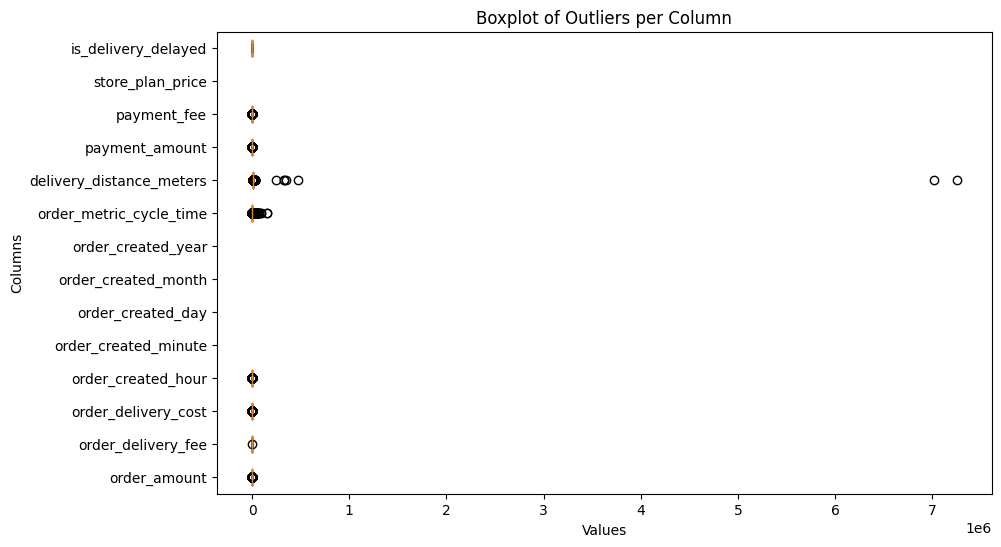

In [18]:
# Select only columns of type float64 or int64, excluding order_id
numeric_cols = orders_df.select_dtypes(include=['float64', 'int64'])

# Prepare a list to store outliers for each column
outliers_list = []

# Iterate over the numeric columns
for col in numeric_cols.columns:
    # Calculate the IQR of the column
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

    # Add the values of the outliers found to the list
    outliers_list.append(outliers[col].values)

# Plot boxplots for each column with outliers
plt.figure(figsize=(10, 6))
plt.boxplot(outliers_list, labels=numeric_cols.columns, vert=False)
plt.title('Boxplot of Outliers per Column')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

Now, there are some important insights we can collect from the boxplot. **First, let's check the attributes with outliers**:
  * *payment_amount* have only a few outliers, anyway, we'll check below
  * *delivery_distance_meters* have several outliers, so let's also check

In [19]:
# Calculate the IQR of the 'payment_amount' column
Q1 = orders_df['payment_amount'].quantile(0.25)
Q3 = orders_df['payment_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_sorted_payment_amount = outliers.sort_values(by='payment_amount', ascending=False)

# Display the outliers
display(outliers_sorted_payment_amount.head())

# Shape
outliers_sorted_payment_amount.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_cycle_time,delivery_distance_meters,payment_amount,payment_fee,store_plan_price,is_delivery_delayed
25485,703.20,11.9,14.00,14,37,27,3,2021,187.27,721.0,715.10,19.31,0.0,1
25590,703.20,11.9,14.00,14,37,27,3,2021,187.27,721.0,715.10,19.31,0.0,1
120451,613.00,9.9,0.00,21,59,11,4,2021,160.87,2591.0,622.90,9.34,49.0,1
271466,555.75,11.9,6.98,16,38,2,1,2021,111.30,4649.0,567.65,15.33,0.0,1
352723,540.00,0.0,8.75,21,2,31,1,2021,67.42,3344.0,540.00,8.10,49.9,1


(7581, 14)

In [20]:
# Calculate the IQR of the 'delivery_distance_meters' column
Q1 = orders_df['delivery_distance_meters'].quantile(0.25)
Q3 = orders_df['delivery_distance_meters'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_sorted_delivery_distance_meters = outliers.sort_values(by='delivery_distance_meters', ascending=False)

# Display the outliers
display(outliers_sorted_delivery_distance_meters.head())

# Shape
outliers_sorted_delivery_distance_meters.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_cycle_time,delivery_distance_meters,payment_amount,payment_fee,store_plan_price,is_delivery_delayed
289974,51.9,8.99,30.49,16,12,12,3,2021,124.95,30307.0,60.89,0.00,49.9,1
256511,9.5,15.90,3.70,23,13,1,2,2021,1460.83,16886.0,25.40,0.51,29.0,1
256513,9.5,15.90,20.03,23,17,1,2,2021,1456.27,15540.0,25.40,0.51,29.0,1
366217,30.0,0.00,17.74,20,22,31,3,2021,98.13,14808.0,30.00,0.45,49.0,1
256512,9.5,15.90,4.00,23,15,1,2,2021,1461.32,14361.0,25.40,0.51,29.0,1


(7581, 14)

The quantity of rows from *payment_amount* and *delivery_distance_meters* are the same. So, the higher is the distance, the higher the price. So... they are outliers but they're also correct values. **So, let's keep it.**


Now, we'll check the attributes that have no boxplot:
  * *average_order_metric_cycle_time* is empty because we defined this columns as average values for each state, so de variation is too small
  * *order_created_year*, *order_created_month*, *order_created_day* and *order_created_minute* are columns with values well defined (year always 2021, month from 1 to 12, day from 1 to 31 and minute from 0 to 60
  * *store_plan_price* we need to check what exactly is happening to understand why the boxplot is "empty"

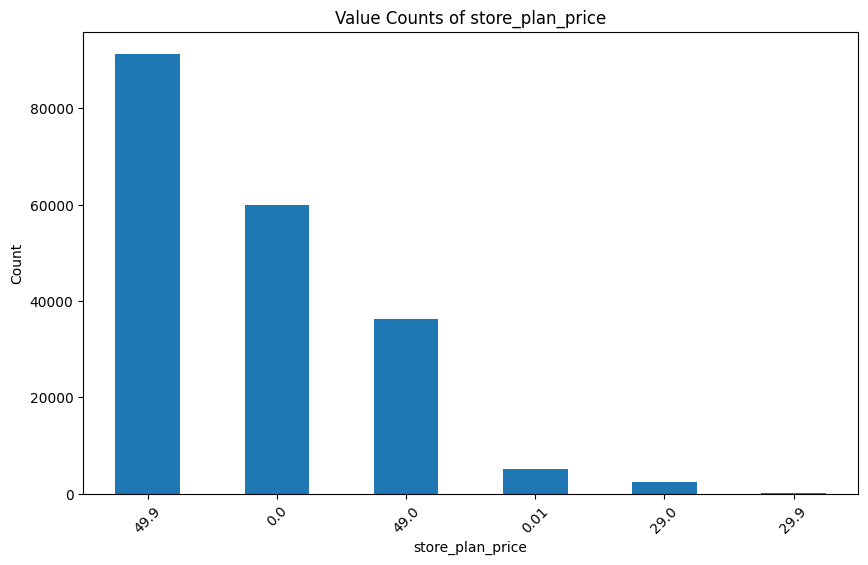

In [21]:
# Count Values
value_counts = orders_df.value_counts('store_plan_price')

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of store_plan_price')
plt.xlabel('store_plan_price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

With the chart above we can check that the values are always the same, that is why the boxplot is "empty". So, everything is set.

#### 2.1.7 Null and NaNs
Let's apply the Nulls and NaNs treatment. Usually these treatments are done before the business rules applications, but, since after the applications we'll have less attributes to analyze, we are performing after.

In [22]:
# Check status of nulls in the columns
orders_df.isnull().sum()

order_amount                    0
order_delivery_fee              0
order_delivery_cost          2559
order_created_hour              0
order_created_minute            0
order_created_day               0
order_created_month             0
order_created_year              0
order_metric_cycle_time       162
delivery_distance_meters       12
payment_amount                  0
payment_fee                     0
payment_method                  0
channel_name                    0
channel_type                    0
driver_modal                    0
driver_type                     0
store_plan_price            66055
hub_name                        0
is_delivery_delayed             0
dtype: int64

Now, we'll go deeper into each attribute.

In [23]:
# Order delivery Cost
orders_df[(orders_df['order_delivery_cost'].isnull())]

# Here, let's consider the NaN values as the average of all delivery cost
# Find mean of order delivery cost
mean_delivery_cost = orders_df['order_delivery_cost'].mean()

# Replace the NaN values with the mean
orders_df['order_delivery_cost'].fillna(mean_delivery_cost, inplace=True)

In [24]:
# Delivery Distance Meters
orders_df[(orders_df['delivery_distance_meters'].isnull())]

# Since there are only 12 values, let's drop the instances
orders_df = orders_df.dropna(subset=['delivery_distance_meters'])

In [25]:
# Order metric cycle time
orders_df[(orders_df['order_metric_cycle_time'].isnull())]

# Here, let's consider the NaN values as the average of all order_metric_cycle_time. Find mean of order_metric_cycle_time
mean_delivery_cost = orders_df['order_metric_cycle_time'].mean()

# Replace the NaN values with the mean
orders_df['order_metric_cycle_time'].fillna(mean_delivery_cost, inplace=True)

<ipython-input-25-1905501d1ca7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_metric_cycle_time'].fillna(mean_delivery_cost, inplace=True)


The *store_plan_price* have simular data, but, since we don't have further information of why is empty and there is no pattern in the NaN values, we'll choose to drop this column for the model be more precise.

In [26]:
# Drop column
orders_df = orders_df.drop('store_plan_price', axis = 1)

In [27]:
# Check status of nulls in the columns
orders_df.isnull().sum()

order_amount                0
order_delivery_fee          0
order_delivery_cost         0
order_created_hour          0
order_created_minute        0
order_created_day           0
order_created_month         0
order_created_year          0
order_metric_cycle_time     0
delivery_distance_meters    0
payment_amount              0
payment_fee                 0
payment_method              0
channel_name                0
channel_type                0
driver_modal                0
driver_type                 0
hub_name                    0
is_delivery_delayed         0
dtype: int64

In [28]:
# Reset index from dataframe
orders_df = orders_df.reset_index(drop=True)

There is no need to transform the data types, since it is all properly set.

#### 2.1.8 Feature Engineering

In [30]:
# Getting columns of type 'object'
object_columns = orders_df.select_dtypes(include=['object']).columns

# Applying one-hot encoding for each column of type 'object'
for column in object_columns:
    orders_df = pd.get_dummies(orders_df, columns=[column])

# Viewing the DataFrame after applying one-hot encoding
display(orders_df.head())

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_cycle_time,delivery_distance_meters,payment_amount,payment_fee,is_delivery_delayed,payment_method_BANK_TRANSFER_DC,payment_method_CREDIT,payment_method_CREDIT_STORE,payment_method_DEBIT,payment_method_DEBIT_STORE,payment_method_INSTALLMENT_CREDIT_STORE,payment_method_MEAL_BENEFIT,payment_method_MONEY,payment_method_ONLINE,payment_method_PAYMENT_LINK,payment_method_STORE_DIRECT_PAYMENT,payment_method_VOUCHER,payment_method_VOUCHER_DC,payment_method_VOUCHER_OL,payment_method_VOUCHER_STORE,channel_name_ALL PLACE,channel_name_ATCHIN PLACE,channel_name_BERLIN PLACE,channel_name_BRAZIL PLACE,channel_name_CAICAI PLACE,channel_name_EATS PLACE,channel_name_FOOD PLACE,channel_name_FULL PLACE,channel_name_LISBON PLACE,channel_name_MADRID PLACE,channel_name_OTHER PLACE,channel_name_OWN PLACE,channel_name_PHONE PLACE,channel_name_READY PLACE,channel_name_REGISTER PLACE,channel_name_RIBA PLACE,channel_name_RONALD PLACE,channel_name_SAN PLACE,channel_name_SEARCH PLACE,channel_name_SHOPP PLACE,channel_name_SPEED PLACE,channel_name_STORE PLACE,channel_name_THINK PLACE,channel_name_VELOCITY PLACE,channel_name_WEAR PLACE,channel_name_WHATS PLACE,channel_type_MARKETPLACE,channel_type_OWN CHANNEL,driver_modal_MOTOBOY,driver_type_FREELANCE,driver_type_LOGISTIC OPERATOR,hub_name_AVENUE SHOPPING,hub_name_BEACH SHOPPING,hub_name_BLACK SHOPPING,hub_name_COFFEE SHOPPING,hub_name_COLOR SHOPPING,hub_name_FORTRAN SHOPPING,hub_name_GOLDEN SHOPPING,hub_name_GREEN SHOPPING,hub_name_HIP HOP SHOPPING,hub_name_HOTMILK SHOPPING,hub_name_PAGODE SHOPPING,hub_name_PEOPLE SHOPPING,hub_name_PHP SHOPPING,hub_name_PURPLE SHOPPING,hub_name_PYTHON SHOPPING,hub_name_R SHOPPING,hub_name_RAP SHOPPING,hub_name_REACT SHOPPING,hub_name_RIVER SHOPPING,hub_name_RUBY SHOPPING,hub_name_SAMPA SHOPPING,hub_name_SMALL SHOPPING,hub_name_SQL SHOPPING,hub_name_STAR SHOPPING,hub_name_SUBWAY SHOPPING,hub_name_WOLF SHOPPING
0,129.45,11.9,8.00,15,17,3,1,2021,41.62,1357.0,141.35,3.82,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,113.40,11.9,8.24,22,13,14,1,2021,57.10,1400.0,113.30,3.06,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,113.40,11.9,8.24,22,13,14,1,2021,57.10,1400.0,12.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,109.40,11.9,7.73,23,13,14,1,2021,71.82,6692.0,121.30,3.28,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [31]:
# Changing names of columns to upper case
orders_df.columns = orders_df.columns.str.upper()

# Replace spaces with underscore
orders_df.columns = orders_df.columns.str.replace(' ', '_')

# Check if the operation was well done
orders_df.columns

Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'ORDER_METRIC_CYCLE_TIME',
       'DELIVERY_DISTANCE_METERS', 'PAYMENT_AMOUNT', 'PAYMENT_FEE',
       'IS_DELIVERY_DELAYED', 'PAYMENT_METHOD_BANK_TRANSFER_DC',
       'PAYMENT_METHOD_CREDIT', 'PAYMENT_METHOD_CREDIT_STORE',
       'PAYMENT_METHOD_DEBIT', 'PAYMENT_METHOD_DEBIT_STORE',
       'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERLIN_PLACE',
       'CHANNEL_NAME_BRAZIL_PLACE', 'CHANNEL_NAME_CAICAI_PLACE',
       'CHANNEL

In [32]:
orders_df.shape

(261457, 85)

Now the data is set to start the machine learning model!

### 2.2 Train and Test
In machine learning, the training step involves feeding a model with labeled data, allowing it to learn patterns and relationships between input features and corresponding outputs. During training, the model adjusts its parameters iteratively to minimize a predefined loss function, optimizing its ability to make accurate predictions.

Once trained, the model is tested using a separate dataset (the test set) that it hasn't seen before. This step evaluates the model's performance on unseen data, assessing its ability to generalize and make accurate predictions beyond the training data. Test results help determine the model's effectiveness and whether adjustments are needed to improve its performance or generalization capabilities.

#### 2.2.1 Holdout Division - Train and Test
O método holdout é uma técnica de avaliação de modelos em machine learning, onde o conjunto de dados disponível é dividido em dois conjuntos distintos: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste é retido, ou "holdout", e não é utilizado durante o treinamento. Após o treinamento, o modelo é avaliado no conjunto de teste para verificar seu desempenho em dados não vistos anteriormente. Essa técnica é fundamental para verificar se o modelo é capaz de generalizar bem para novos dados e para evitar o ajuste excessivo (overfitting).

First, let's create our variables for the train and test.

In [55]:
# Creating a variable with the return the values in an array format
array = orders_df.values

# Finding the position of the target attribute
target_column_position = orders_df.columns.get_loc('IS_DELIVERY_DELAYED')

# Creating the variable X, with X = attributes that will be used as features (features = atributos de entrada)
X = array[:, np.r_[:target_column_position, 13:85]] # Select all instances (using ":"), but only the columns 0-11 and 13-84 (using "np.r_[:12, 13:85]")

# Creating the variable y, with y = attribute that will be used as label (or target) (label / target = atributo de saída)
y = array[:,target_column_position]

Than, let's split the data in train and test. We'll use 20% as test `test_size = 0.20` and define a seed to ensure that the data will be properly splited `random_state = 7`.

NOTE: increasing the size of `test_size` will result in a less accurate code, but it will be more performant (for general testing purposes, it's a good idea to use high values of test_size).

In [56]:
# Dividing the model into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=7) # MUDAR O TEST_SIZE PARA 0.20, AGORA APENAS PARA SER MAIS PERFORMÁTICO

# Transform the data to be able to perform the cross validation
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Getting the number of instances and attributes for the training and test sets
print(f"Number of instances and attributes for the training data: {X_train.shape}")
print(f"Number of instances and attributes for the test data: {X_test.shape}")

Number of instances and attributes for the training data: (26145, 84)
Number of instances and attributes for the test data: (235312, 84)


#### 2.2.2 Cross Validation
A validação cruzada tem como objetivo principal é estimar o quão bem o modelo irá generalizar para dados não vistos, ou seja, dados que não foram usados durante o treinamento do modelo. O procedimento básico envolve dividir o conjunto de dados disponível em subconjuntos menores, chamados de "folds". Um desses subconjuntos é retido como dados de teste para avaliação do modelo, enquanto os outros são usados como dados de treinamento. Esse processo é repetido várias vezes, com cada subconjunto sendo usado como conjunto de teste em diferentes iterações. Existem várias estratégias de validação cruzada, sendo a validação cruzada k-fold uma das mais comuns. Nessa abordagem, os dados são divididos em k subconjuntos (folds), e o processo de treinamento e avaliação é repetido k vezes, cada vez usando um fold diferente como conjunto de teste e os restantes como conjunto de treinamento. Ao final das k iterações, são calculadas **métricas de desempenho**, como :
  * Acurácia
  * Precisão
  * Recall
  * F1-score
  
Estas metricas são calculadas para cada fold de teste. **A média dessas métricas é então usada como uma estimativa do desempenho do modelo no conjunto de dados como um todo**. A validação cruzada é uma técnica importante para garantir que o modelo seja robusto e generalize bem para novos dados, além de ajudar a evitar problemas como overfitting (sobreajuste) e underfitting (subajuste).

The first part is to define the number of partitions (folds) for the cross-validation. Here, we should define it according to the number of instances we have in our dataset. Let's apply 10 partitions since we have only 261457 instances in our dataset. In addition `shuffle=True`, the data will be shuffled and the seed will be 7 (`random_state=7`).

In [57]:
# Defining the number of folds for the cross validation
num_partitions = 3 # MUDAR PARA 10, AGORA APENAS PARA RODAR MAIS RÁPIDO

# Create an object to perform the cross validation
kfold = KFold(n_splits=num_partitions, shuffle=True, random_state=7)

  ESCREVER QUAIS ALGORITMOS SERÃO USADOS!

##### 2.2.2.1 Evaluation Metric - Accurancy
A precisão mede a proporção de verdadeiros positivos em relação ao total de casos positivos previstos pelo modelo. É útil quando o foco está em minimizar os falsos positivos. Considerações:
  * Usar quando todas as classes são igualmente importantes e a taxa de acertos global é relevante
  * Não é adequada para conjuntos de dados com classes desbalanceadas, pois pode fornecer uma visão distorcida do desempenho do modelo

In [59]:
# Defining the global seed to the code cell
np.random.seed(7)

# List to store the models, the results and their names
models = []
results = []
names = []

# Preparing models and adding them into a list
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Checking models one by one
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

KNN: 0.978428 (0.001013)
CART: 0.997782 (0.000195)
NB: 0.893326 (0.016524)
SVM: 0.975215 (0.001170)


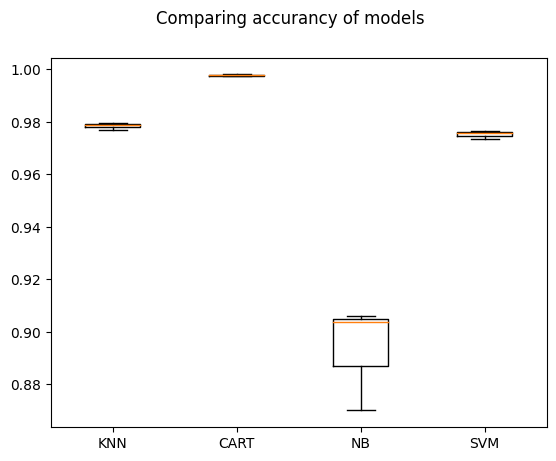

In [60]:
# Boxplot comparing models
fig = plt.figure()
fig.suptitle('Comparing accurancy of models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 2.2.2.2 Evaluation Metric - Recall
O recall, também conhecido como sensibilidade, mede a proporção de verdadeiros positivos em relação ao total de casos positivos verdadeiros na amostra. É útil quando é importante identificar a maioria dos casos positivos. Considerações:
  * Usar quando o foco está em detectar todos os exemplos positivos, minimizando os falsos negativos
  * É útil quando os falsos negativos são considerados mais prejudiciais do que os falsos positivos

In [71]:
# Defining the global seed to the code cell
np.random.seed(7)

# List to store the models, the results and their names
models = []
results = []
names = []

# Preparing models and adding them into a list
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Checking models one by one
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

KNN: 0.278481 (0.019055)
CART: 0.969713 (0.006732)
NB: 0.761315 (0.064090)
SVM: 0.141882 (0.018002)


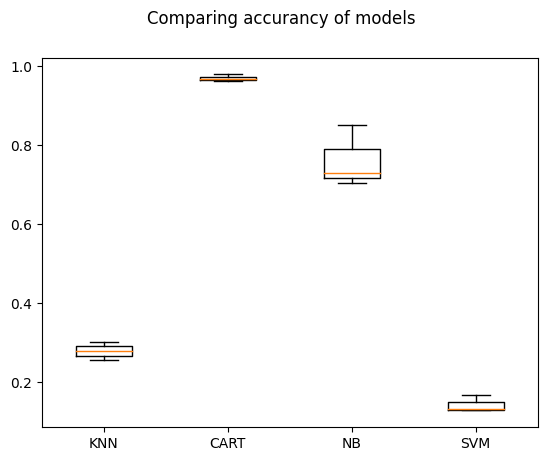

In [72]:
# Boxplot comparing models
fig = plt.figure()
fig.suptitle('Comparing accurancy of models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 2.2.2.3 Evaluation Metric - F1 Score
O F1 Score é a média harmônica da precisão e do recall. Ele fornece uma única medida que equilibra a precisão e o recall. É útil quando há um desequilíbrio entre as classes. Considerações:
  * É a média harmônica entre precisão e recall e é útil quando há desequilíbrio entre as classes
  * Funciona bem quando você precisa de um equilíbrio entre precisão e recall

In [73]:
# Defining the global seed to the code cell
np.random.seed(7)

# List to store the models, the results and their names
models = []
results = []
names = []

# Preparing models and adding them into a list
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Checking models one by one
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

KNN: 0.426428 (0.021380)
CART: 0.961584 (0.005352)
NB: 0.293116 (0.006990)
SVM: 0.247778 (0.026904)


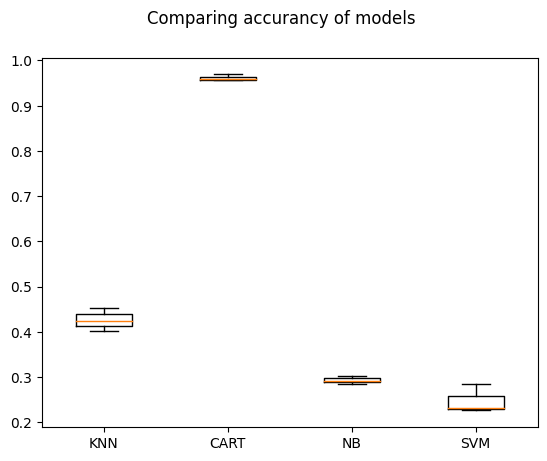

In [74]:
# Boxplot comparing models
fig = plt.figure()
fig.suptitle('Comparing accurancy of models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 2.2.2.3 Evaluation Metric - Curva ROC (Receiver Operating Characteristic Curve)
A curva ROC é uma representação gráfica da taxa de verdadeiros positivos versus a taxa de falsos positivos para diferentes pontos de corte. É útil para avaliar o desempenho de um modelo de classificação em diferentes limiares de decisão e para comparar o desempenho de diferentes modelos. Considerações:
  * Útil para avaliar a capacidade de separação do modelo entre duas classes
  * Funciona bem em conjuntos de dados desbalanceados e não depende do threshold de classificação

In [66]:
# Defining the global seed to the code cell
np.random.seed(7)

# List to store the models, the results and their names
models = []
results = []
names = []

# Preparing models and adding them into a list
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))

# Checking models one by one
for name, model in models:
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=kfold, method='predict_proba')
    roc_auc = roc_auc_score(y_train, y_pred_prob[:, 1])
    results.append(roc_auc)
    names.append(name)
    msg = "%s: %f" % (name, roc_auc)
    print(msg)

KNN: 0.766813
CART: 0.984079
NB: 0.917833
SVM: 0.956513


#### 2.2.3 Holdout Training

In [76]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9987633439858571


### 2.3 Feature Selection
Feature selection is the process of selecting a subset of the original features from a dataset that are most relevant to the specific problem being addressed. Its objective is to enhance model performance, mitigate overfitting, reduce training time, and enhance interpretability by eliminating irrelevant, redundant, or detrimental features. This process can be accomplished through various techniques, including statistical methods, heuristic approaches, and model-based strategies. Essentially, feature selection streamlines and optimizes the modeling process by retaining only the most crucial features for predicting or elucidating the target variable.

Some methods of feature selection include:

* Univariate selection
* Recursive feature elimination (RFE)
* Feature importance


#### 2.2.1 Univariate Selection

In univariate selection, statistical tests are used to select attributes that have the strongest relationship with the output variable. SelectKBest is the most commonly used technique. It can be used with various statistical metrics (in the `score_func` parameter), such as:

* Chi-squared test `chi2` (categorical input and numerical output **and** categorical input and categorical output)
* ANOVA `f_classif` (numerical input and categorical output)
* Pearson correlation `f_regression` (numerical input and numerical output)

Univariate selection, as the name suggests, analyzes each feature individually, regardless of other features. A statistical metric is computed for each feature with respect to the output variable. Based on this metric, features that have a statistically significant relationship with the output variable are selected.

 **SELECTKBEST ONLY ACCEPTS NUMERICAL INPUTS (SO FOR CATEGORICAL INPUTS, IT IS NECESSARY TO CONVERT THEM TO NUMBERS, EITHER USING ONE-HOT ENCODING OR ANOTHER METHOD)**.


In [ ]:
# Let's start by spliting our dataset into train and test (holdout)
# The code below returns the data in a numpy array format. Example: [[a,1,3], [b,2,7]]), that each "list (between []) is an instance"
array = orders_df.values

# Finding position of the target column
target_column_position = orders_df.columns.get_loc('IS_DELIVERY_DELAYED')

X = array[:, np.r_[:12, 13:85]] # Attributes. Just use the dataset.shape and use one value less than the number of columns. Remove the column with the target attribution
y = array[:,target_column_position] # Classes (IS_DELIVERY_DELAYED is in position 14)

# To integer
X = X.astype(int)
y = y.astype(int)

In [ ]:
# Utilizando A nova F-value (depois verificar)
# Seleção dos atributos com selectKBest
best_var = SelectKBest(score_func = chi2, k = 10) # k é o numero de atributos que teremos no final

# Executa a função de pontuação em (X, y) e obtem os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Results
print(f'\nNúmero original de atributos:', X.shape[1])
print(f' \nNúmero reduzido de atributos:', features.shape[1])

# Exibe atributos originais
print("\nAtributos Originais:", orders_df.columns)

# Exibe as pontuações de cada atributo e os 4 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3, suppress=True, formatter={'float': '{:0.3f}'.format}) # 3 casas decimais e não suprimir a formatação exponencial
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features = orders_df.columns[0:84]))


Número original de atributos: 84
 
Número reduzido de atributos: 10

Atributos Originais: Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'ORDER_METRIC_CYCLE_TIME',
       'DELIVERY_DISTANCE_METERS', 'PAYMENT_AMOUNT', 'PAYMENT_FEE',
       'IS_DELIVERY_DELAYED', 'PAYMENT_METHOD_BANK_TRANSFER_DC',
       'PAYMENT_METHOD_CREDIT', 'PAYMENT_METHOD_CREDIT_STORE',
       'PAYMENT_METHOD_DEBIT', 'PAYMENT_METHOD_DEBIT_STORE',
       'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERL

#### 2.2.2 Eliminação Recursiva de Atributos
Na eliminação recursiva de atributos, os atributos são removidos recursivamente e vai sendo construído um modelo com os que permanecem, usando o resultado do modelo (por exemplo, a acurácia) para identificar quais atributos mais contribuem para a predição da variável de saída. Nele, se está considerando o desempenho do modelo como um todo. **Você escolhe um algoritmo de modelo (como Logistic Regression, SVM, Árvores de Decisão, etc.) e treina o modelo com todas as características**. Em seguida, você avalia a importância de cada característica usando o modelo treinado e elimina recursivamente as características menos importantes até que um critério de parada seja atendido.

In [ ]:
# Criação o modelo
modelo = LogisticRegression(max_iter = 200)

# Eliminação Recursiva de Atributos
rfe = RFE (modelo, n_features_to_select = 4)
X = X.astype(int)
y = y.astype(int)
fit = rfe.fit(X, y)


# Print dos resultados
print("Atributos Originais:", orders_df.columns[0:85])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de Atributos: %s" % fit.ranking_)
print("\nQtd de melhores atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features = orders_df.columns[0:85]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

#### 2.2.3 Importância de Atributos
Já na importância de atributos, são utilizados algoritmos de machine learning (como Random Forest ou Extra Trees) para estimar a importância dos atributos, fazendo uma pré-seleção. É possível também realizar a operação de feature selection de forma intrínseca, através de algoritmos que fazem a seleção de atributos automaticamente como parte do treinamento do modelo (por exemplo, regressão linear com regularização Lasso e árvores de decisão).

In [ ]:
# Criação de modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators = 100)
modelo.fit(X, y)

# Exibe Atributos Originais
print("\nAtributos Originais:", orders_df.columns[0:85])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo)
print(modelo.feature_importances_)

## 3. MODELING AND TRAINING
Objetivo: construir modelos para resolver o problema em questão.

* Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
* Há algum ajuste inicial para os hiperparâmetros?
* O modelo foi devidamente treinado? Foi observado problema de underfitting?
* É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
* Há algum método avançado ou mais complexo que possa ser avaliado?
* Posso criar um comitê de modelos diferentes para o problema (ensembles)?

## 4. RESULT EVALUATION
Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

* Selecione as métricas de avaliação condizentes com o problema, justificando.
* Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
* Os resultados fazem sentido?
* Foi observado algum problema de overfitting?
* Compare os resultados de diferentes modelos.
* Descreva a melhor solução encontrada, justificando.

## FALTANTE

O que falta:
  * Verificar o que fazer sobre feature selection (usar as 50+ colunas?)
  * Verificar ate onde a etapa de pre processamento vai valer para todos os modelos
  * Devo criar mais de um modelo?
  * Devo normalizar algum dado?
  * Hiperparametros
  * underfitting ? overfitting?
  * Criar modelos de esembles (que sao modelos de ML combinados)



